# Assignment 5
Emily Bosacker<br/>
Machine Learning<br/>
763-01
<br/>
<br/>

1) Load the dataset and display a scatter plot with all the data instances. Column 1 needs to be plotted on the X-axis and
Column 2 on the Y-axis. Color code the points based on their class label. That is, instances of the same class should be
displayed with the same color. Another color needs to be used for instances of the second class. This plot will show you
the distribution of the two classes.

Split the dataset into training and testing (70-30 split). To do this, when you call the train_test_split function make sure
you specify the random_state parameter like this, random_state=0. This is to ensure that we all get the same train and test
splits. 

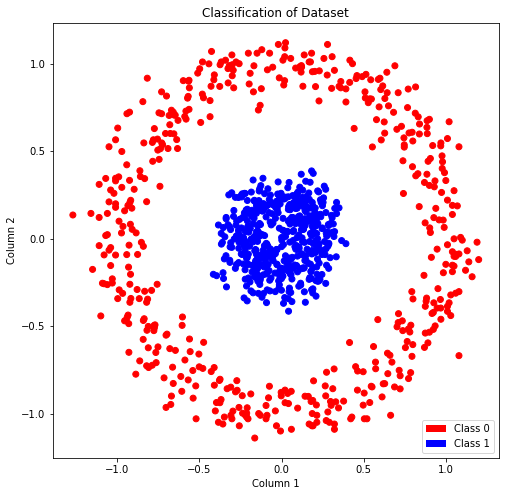

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Loading the dataset
dataset = pd.read_csv('assign5data.csv')

X = dataset.iloc[:,0:2].values
y = dataset.iloc[:,2].values

#visualize 2d plot, col1 x-axis, col2 y-axis, color code points based on class
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
colors = ['red', 'blue']
classes = ['0', '1']
fig = plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, cmap=ListedColormap(colors))
classes = ['Class 0', 'Class 1']
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,classes,loc=4)
plt.title("Classification of Dataset")
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.show()

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

2) Fit a logistic regression model. What is the model accuracy on the test set?

In [41]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Model Accuracy
print('Model Accuracy:\n', classifierObj.score(X_test, y_test))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Model Accuracy:
 0.33
Confusion Matrix:
 [[ 69  76]
 [125  30]]


3) Perform PCA on the dataset and retain 2 principal components. Visualize this 2 dimensional data with a scatter plot
like before. (Same color for class labels as above). 

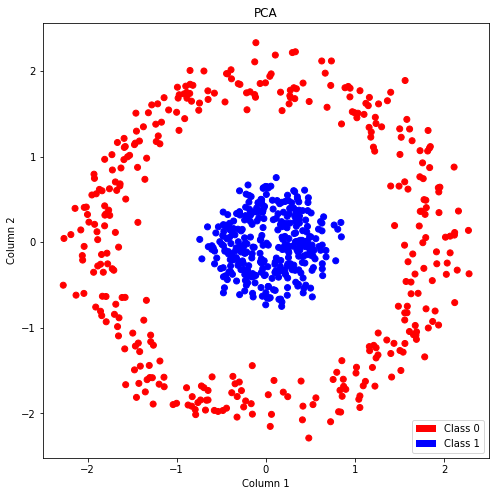

In [42]:
#Applying PCA
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=2)
pc2_X_train = pcaObj.fit_transform(X_train)
pc2_X_test = pcaObj.transform(X_test)
pc2_components_variance = pcaObj.explained_variance_ratio_

# Visualising the Training set results
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
colors = ['red', 'blue']
classes = ['0', '1']
fig = plt.figure(figsize=(8,8))
plt.scatter(pc2_X_train[:,0], pc2_X_train[:,1], c=y_train, cmap=ListedColormap(colors))
classes = ['Class 0', 'Class 1']
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,classes,loc=4)
plt.title("PCA")
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.show()


4) Fit a logistic regression model on this dataset. What is the model accuracy on the test set?

In [43]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
pc2ClassifierObj = LogisticRegression(random_state=0)
pc2ClassifierObj.fit(pc2_X_train, y_train)

#Making predictions on the Test Set
pc2_y_pred = pc2ClassifierObj.predict(pc2_X_test)

#Model Accuracy
print('Model Accuracy:\n', pc2ClassifierObj.score(pc2_X_test, y_test))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pc2_y_pred)
print('Confusion Matrix:\n', cm)

Model Accuracy:
 0.33
Confusion Matrix:
 [[ 69  76]
 [125  30]]


5) Now perform PCA and retain only one principal component and visualize the data like before. This time your plot
should be a horizontal line since you have just one dimension. 

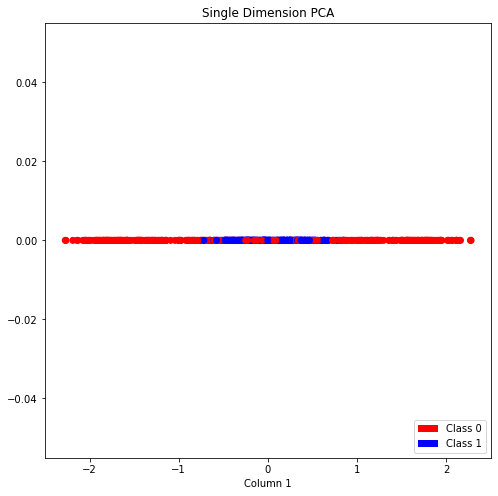

In [44]:
#Applying PCA
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=1)
pc1_X_train = pcaObj.fit_transform(X_train)
pc1_X_test = pcaObj.transform(X_test)
pc1_components_variance = pcaObj.explained_variance_ratio_

# Visualising the Training set results
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
colors = ['red', 'blue']
classes = ['0', '1']
fig = plt.figure(figsize=(8,8))
plt.scatter(pc1_X_train, np.zeros(((np.shape(pc1_X_train)[0]), 1)), c=y_train, cmap=ListedColormap(colors))
classes = ['Class 0', 'Class 1']
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,classes,loc=4)
plt.title("Single Dimension PCA")
plt.xlabel("Column 1")
plt.ylabel("")
plt.show()

6) Fit a logistic regression model on this dataset. What is the model accuracy on the test set?

In [45]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
pc1ClassifierObj = LogisticRegression(random_state=0)
pc1ClassifierObj.fit(pc1_X_train, y_train)

#Making predictions on the Test Set
pc1_y_pred = pc1ClassifierObj.predict(pc1_X_test)

#Model Accuracy
print('Model Accuracy:\n', pc1ClassifierObj.score(pc1_X_test, y_test))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pc1_y_pred)
print('Confusion Matrix:\n', cm)

Model Accuracy:
 0.3433333333333333
Confusion Matrix:
 [[ 75  70]
 [127  28]]


7) Perform LDA. Your dataset should have just one dimension. Visualize this data like before. 

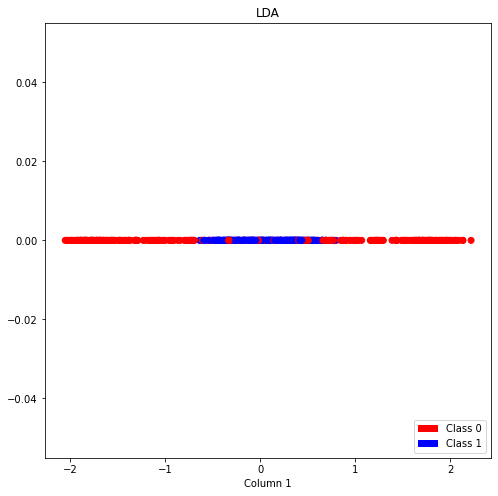

In [46]:
#Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ldaObj = LDA(n_components=1)
lda_X_train = ldaObj.fit_transform(X_train,y_train)
lda_X_test = ldaObj.transform(X_test)
components_variance = ldaObj.explained_variance_ratio_

# Visualising the Training set results
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
colors = ['red', 'blue']
classes = ['0', '1']
fig = plt.figure(figsize=(8,8))
plt.scatter(lda_X_train, np.zeros(((np.shape(lda_X_train)[0]), 1)), c=y_train, cmap=ListedColormap(colors))
classes = ['Class 0', 'Class 1']
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,classes,loc=4)
plt.title("LDA")
plt.xlabel("Column 1")
plt.ylabel("")
plt.show()

8) Fit a logistic regression model on this dataset. What is the model accuracy on the test set?

In [47]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
ldaClassifierObj = LogisticRegression(random_state=0)
ldaClassifierObj.fit(lda_X_train, y_train)

#Making predictions on the Test Set
lda_y_pred = ldaClassifierObj.predict(lda_X_test)

#Model Accuracy
print('Model Accuracy:\n', ldaClassifierObj.score(lda_X_test, y_test))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lda_y_pred)
print('Confusion Matrix:\n', cm)

Model Accuracy:
 0.33
Confusion Matrix:
 [[ 69  76]
 [125  30]]


9) Perform Kernel PCA and retain two components. Visualize this data like before. 

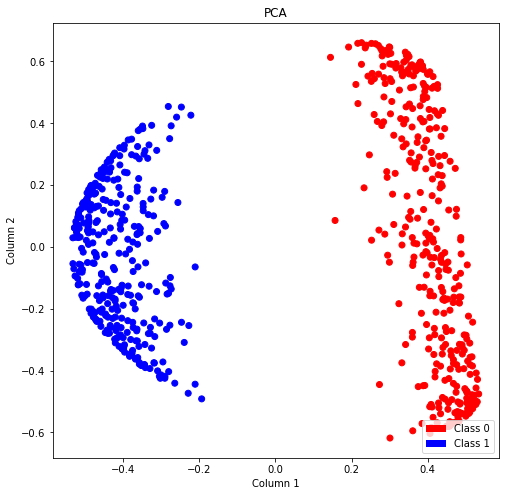

In [48]:
#kernel PCA
from sklearn.decomposition import KernelPCA
kernelPCAObj = KernelPCA(n_components=2, kernel='rbf')
kpca_X_train = kernelPCAObj.fit_transform(X_train)
kpca_X_test = kernelPCAObj.transform(X_test)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
colors = ['red', 'blue']
classes = ['0', '1']
fig = plt.figure(figsize=(8,8))
plt.scatter(kpca_X_train[:,0], kpca_X_train[:,1], c=y_train, cmap=ListedColormap(colors))
classes = ['Class 0', 'Class 1']
recs = []
for i in range(0,len(colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=colors[i]))
plt.legend(recs,classes,loc=4)
plt.title("PCA")
plt.xlabel("Column 1")
plt.ylabel("Column 2")
plt.show()

10) Fit a logistic regression model on this dataset. What is the model accuracy on the test set?

In [49]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression
kpcaClassifierObj = LogisticRegression(random_state=0)
kpcaClassifierObj.fit(kpca_X_train, y_train)

#Making predictions on the Test Set
kpca_y_pred = kpcaClassifierObj.predict(kpca_X_test)

#Model Accuracy
print('Model Accuracy:\n', kpcaClassifierObj.score(kpca_X_test, y_test))

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, kpca_y_pred))

Model Accuracy:
 1.0
Confusion Matrix:
 [[145   0]
 [  0 155]]
